# ECE680 Checkpoint 1

by Yuxuan Yang(yy340)

This demonstration is conducted on Google Colab. 
PDF file is generated by jupyter nbconvert.

## Function creating 
For delivery of Checkpoint 1, I would defined the following 2 functions.

Function plotBlockStartAtName() will plot the original image as well as the $k*k$ block according to my len of name or initial position.

Function randomDrop will initiate random position according to S and drop the value of the pics to mimic noise.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import ipympl
import imageio as iio
import skimage
import random
import math

In [249]:
def plotBlockStartAtName(addr, first_number, last_number,k):
  image = iio.imread(uri=addr);
  fig,axs = plt.subplots(1,2,figsize=(20,20))
  axs[0].imshow(image,cmap='gray', vmin=0, vmax=255)
  # plt.show()
  x = k*(first_number-1)+1;
  y = k*(last_number-1)+1;
  print(x,y)
  #cut in y
  image_block = image[y:y+k];
  image_final=[]
  #cut in x
  for i in range(k):
    image_final.append(image_block[i][x:x+k]);
  print("block shape:",np.shape(image_final))
  axs[1].imshow(image_final,cmap='gray', vmin=0, vmax=255)
  plt.show();
  return image_final;
  
def randomDrop(image,k,S):
  fig,axs = plt.subplots(1,len(S),figsize=(30,30))
  #convert to float
  image_float = [[float(y) for y in x] for x in image]
  image_float_original = image_float;
  for idx,value in enumerate(S):
    #random drop
    p_to_drop = k*k-value;
    index_drop = random.sample(range(k*k),p_to_drop);
    print("S:",value,"pixel to drop:",p_to_drop);
    for i in index_drop:
      x_drop = i%k;
      y_drop = int(i/k);
      image_float[y_drop][x_drop] = -math.inf;
    axs[idx].imshow(image_float,cmap='gray', vmin=0, vmax=255)
    title="S="+str(value);
    axs[idx].set_title(title,fontsize=30)
    #refresh image_float
    image_float=image_float_original;
  plt.show()

## Small image noise
For small image we use $k=8$ and $S=[50,40,30,20,10]$ accordingly, my first name "yuxuan" indicate length 6 and last name "yang" indicate length 4,
according to equation
(x,y) = (8*(number of letters in first name-1)+1,
8*(number of letters in last name-1)+1),
I got start position (41,25) as left-top corner.

Here are the results:

41 25
block shape: (8, 8)


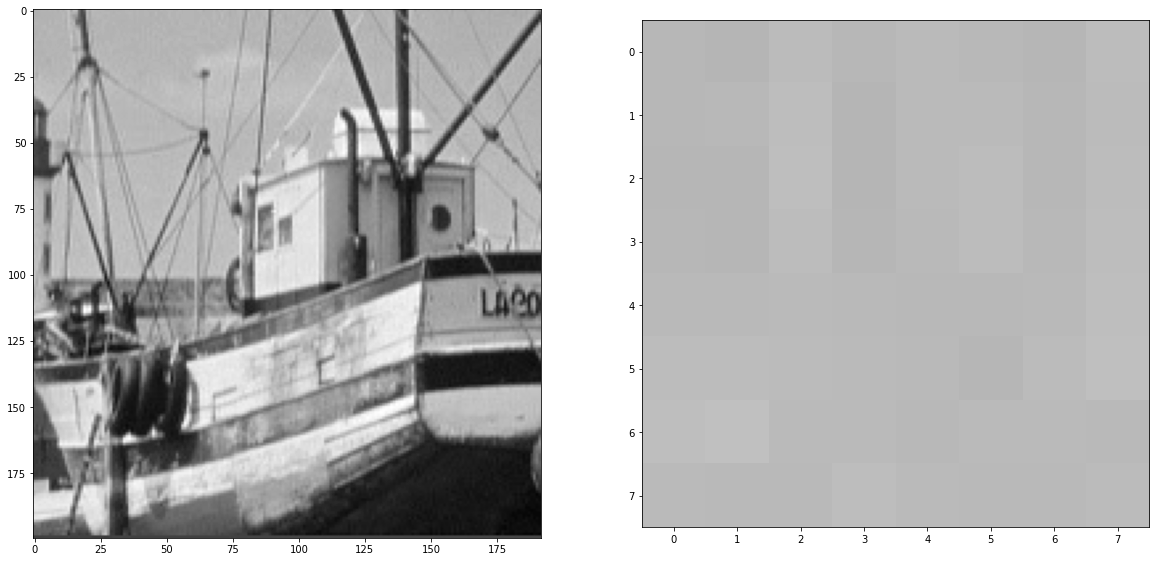

S: 50 pixel to drop: 14
S: 40 pixel to drop: 24
S: 30 pixel to drop: 34
S: 20 pixel to drop: 44
S: 10 pixel to drop: 54


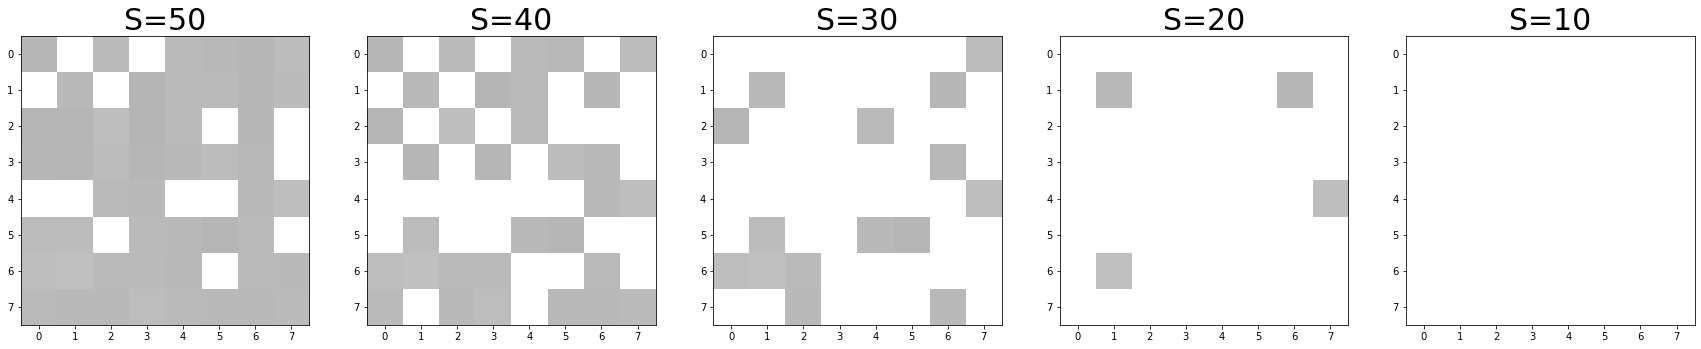

In [250]:
%matplotlib inline
image_k = plotBlockStartAtName("/content/fishing_boat.bmp",6,4,8)
randomDrop(image_k,8,[50,40,30,20,10])


## Large Image noise
For large image we use $k = 16$ amd $S=[150,100,50,30,10]$, my first name "yuxuan"'s alphabet position---"y" indicate position 25 and last name "yang"'s alphabet position---"y" indicate position 25. According to equation: (x,y) = (16*(alphabet position of first initial-1)+1,
16*(alphabet position of last initial-1)+1), we have top left corner is (385,385)

Here are the result:

385 385
block shape: (16, 16)


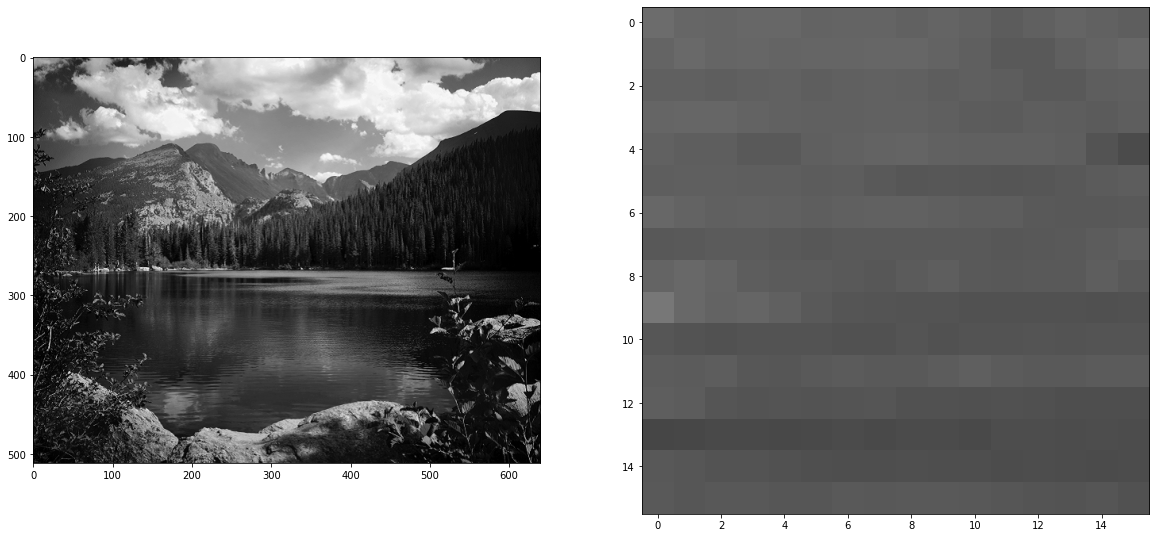

S: 150 pixel to drop: 106
S: 100 pixel to drop: 156
S: 50 pixel to drop: 206
S: 30 pixel to drop: 226
S: 10 pixel to drop: 246


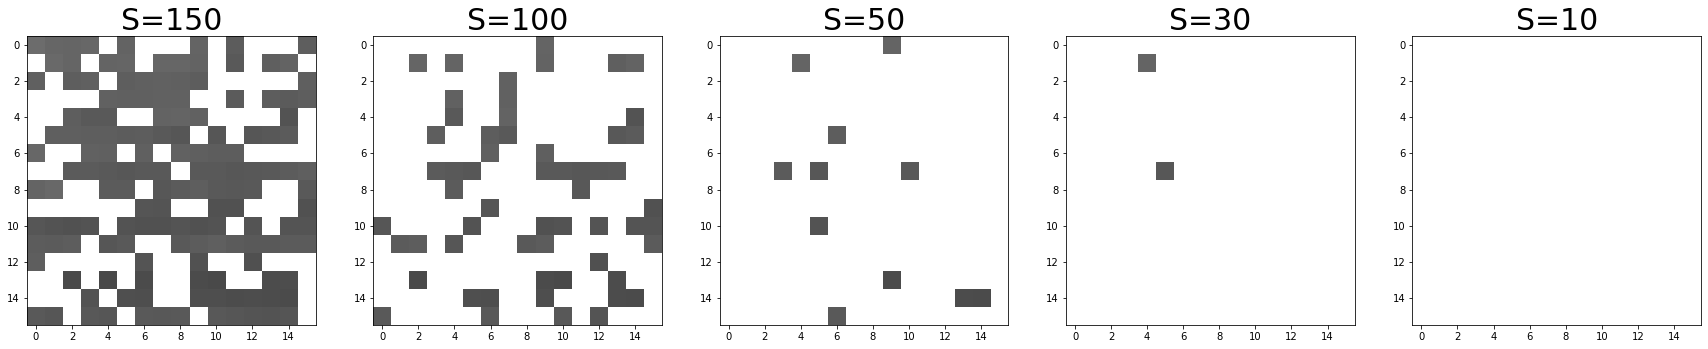

In [258]:
%matplotlib inline
image_m = plotBlockStartAtName("/content/nature.bmp",25,25,16)
randomDrop(image_m,16,[150,100,50,30,10])